In [43]:
import underworld as uw
import matplotlib as mpl
from matplotlib.figure import Figure
import matplotlib.pyplot as pyplot
import numpy as np
import math
import h5py
import glob
import UWGeodynamics as GEO
#from MechanicalProperties import PlateProperties
from pathlib import Path
import sys
import underworld.function as fn
#import glucifer
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.offsetbox import AnchoredText

In [44]:
!pwd

/home/jovyan/user_data/Paper_1_notebooks_Figures


In [99]:
cmap = plt.get_cmap("Reds")
cmap
print(cmap(0.))

(1.0, 0.96078431372549022, 0.94117647058823528, 1.0)


In [120]:
cmap = plt.get_cmap("Reds")
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    print(mcolors.rgb2hex(rgba))

#fff5f0
#fff4ef
#fff4ee
#fff3ed
#fff2ec
#fff2eb
#fff1ea
#fff0e9
#fff0e8
#ffefe8
#ffeee7
#ffeee6
#ffede5
#ffece4
#ffece3
#ffebe2
#feeae1
#feeae0
#fee9df
#fee8de
#fee8dd
#fee7dc
#fee7db
#fee6da
#fee5d9
#fee5d8
#fee4d8
#fee3d7
#fee3d6
#fee2d5
#fee1d4
#fee1d3
#fee0d2
#fedfd0
#fedecf
#fedccd
#fedbcc
#fedaca
#fed9c9
#fed8c7
#fdd7c6
#fdd5c4
#fdd4c2
#fdd3c1
#fdd2bf
#fdd1be
#fdd0bc
#fdcebb
#fdcdb9
#fdccb8
#fdcbb6
#fdcab5
#fdc9b3
#fdc7b2
#fdc6b0
#fdc5ae
#fcc4ad
#fcc3ab
#fcc2aa
#fcc1a8
#fcbfa7
#fcbea5
#fcbda4
#fcbca2
#fcbba1
#fcb99f
#fcb89e
#fcb79c
#fcb69b
#fcb499
#fcb398
#fcb296
#fcb095
#fcaf93
#fcae92
#fcad90
#fcab8f
#fcaa8d
#fca98c
#fca78b
#fca689
#fca588
#fca486
#fca285
#fca183
#fca082
#fc9e80
#fc9d7f
#fc9c7d
#fc9b7c
#fc997a
#fc9879
#fc9777
#fc9576
#fc9474
#fc9373
#fc9272
#fc9070
#fc8f6f
#fc8e6e
#fc8d6d
#fc8b6b
#fc8a6a
#fc8969
#fc8767
#fc8666
#fc8565
#fc8464
#fc8262
#fc8161
#fc8060
#fc7f5f
#fb7d5d
#fb7c5c
#fb7b5b
#fb7a5a
#fb7858
#fb7757
#fb7656
#fb7555
#fb7353
#fb7252
#fb7151
#fb7050
#fb6e4e


In [103]:
print(cmap(0.))

(1.0, 0.96078431372549022, 0.94117647058823528, 1.0)


In [118]:
cmap.

In [111]:
norm = mcolors.Normalize(vmin=0, vmax=5)
norm

In [160]:
def getColoursfromMap(cmapKey,NumColours):
    cmap = plt.get_cmap(cmapKey)
    norm = mcolors.Normalize(vmin=1.5, vmax=NumColours)
    #Base array to calculate the colors
    seedColors=np.arange(0,NumColours,1) #Here is the start color
    colours=cmap(norm(seedColors))
    return colours

def genStdColorArray(Thicknesses,colors,colorflip):
    iColor=0
    limitThick=colorflip[1]
    plotCounter=0
    #Get Colors and put them into an array
    ColorsS=[]
    colorC=0
    for j in colors:
        ColorsS.append(getColoursfromMap(colors[colorC],len(Thicknesses)))
        colorC=colorC+1
    counter=0
    #array which will contain colors to return    
    FinalColours=[]
    
    for i in Thicknesses:
        #Color changes
        if colorflip[0]==True:
            if limitThick> i:
                Colors=ColorsS[0]
            elif limitThick<=i:
                Colors=ColorsS[1]    
            else:
                Colors=ColorsS[0]     
        color=Colors[counter]
        FinalColours.append(color)
        counter=counter+1
    return FinalColours

def velocitiesLoader(DataDir,thickness,typePlot,fileSeed):
    fileName=DataDir+fileSeed+"{0}.txt".format(str(thickness))
    Data = np.genfromtxt(fileName, dtype=float,skip_footer=1)
    if typePlot=="subduction_velocity":
        t,vel=Data[:,0],Data[:,1]
    elif typePlot=="Trench_retreat_vel":
        t,vel=Data[:,0],Data[:,2]
    elif typePlot=="OP_retreat_vel":
        t,vel=Data[:,0],Data[:,3]
    return t,vel

In [286]:
def plotSubploterVelocityAlltxt(figsize,Thicknesses,Colors,plotsIndexes):
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    Nplots=3
    fig, axs = pyplot.subplots(len(plotsIndexes),figsize=figsize,sharex=True)
    #Loop for subplots 
    plotCounter=0
    for dataIndex in plotsIndexes:
        counter=0
        Max=0
        Min=0
        #Loop for iterating thicknesses
        
        for i in Thicknesses:
            seed=axs[plotCounter]
            typePlots=["subduction_velocity","Trench_retreat_vel","OP_retreat_vel","Arc_retreat_vel"]
            names=["Convergence velocity vs Time","Trench-advance velocity vs Time","OP retreat velocity vs Time","Arc retreat velocity vs Time"]
            plotType=typePlots[dataIndex]
            #Load velocity and time data from file
            t,vel=velocitiesLoader('/home/jovyan/user_data/placeVelocitiesData/',i,plotType,"platesVelocities_")
            #t,vel=getTypeVelocity(plotType,Time_array,counter,SPVel,cratVel,OPVel,arcVel)
            #Check for 0km curve
            if i==0:
                colour='black'
            else:
                colour=Colors[counter]
            seed.plot(t,vel,label='{0} Km'.format((eval(str(i)))),linewidth=0.6,color=colour)
            seed.set_ylabel("Velocity (cm/yr)",labelpad=2,fontsize=8)
            seed.legend(fontsize=6,fancybox=True)
            seed.tick_params(axis = 'both', which = 'major', labelsize =8) 
            seed.set_xlim(0,45)
            #seed.yaxis.set_major_locator(mpl.ticker.LinearLocator(5))
            Max=max(vel)
            Min=min(vel)
            if plotCounter==0:
                seed.set_ylim((1.52*Min/5.0),Max*1.541/1.3)
            elif plotCounter==1:
                seed.set_ylim((1.52*Min/1.3),Max*1.541/1.2)
            #Title from loadaed file
            #anchored_title=AnchoredText(names[plotCounter],loc='upper center',pad=0.5,borderpad=0.5,frameon=False,prop=dict(size=15))
            #seed.add_artist(anchored_title)
            
            counter=counter+1
           
        counter=counter-1
        seed.set_xlabel("Time (Ma)",labelpad=2,fontsize=8)
        if plotType=="subduction_velocity":
            seed.axhline(y=0, xmin=0, xmax=max(t)+max(t)/6.,color='black',linestyle='--',linewidth=0.7,alpha=0.4)
            seed.axvline(x=16,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
            seed.axvline(x=22.5,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
            seed.axvline(x=34,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
            
        if plotType=="Trench_retreat_vel":
            seed.axhline(y=0, xmin=0, xmax=max(t)+max(t)/6.,color='black',linestyle='--',linewidth=0.7,alpha=0.4)
            seed.axvline(x=16.,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
            seed.axvline(x=22.5,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
            seed.axvline(x=34.,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)

        if plotType=="OP_retreat_vel":
            seed.axhline(y=0, xmin=0, xmax=max(t)+max(t)/6.,color='black',linestyle='--',linewidth=0.7,alpha=0.4)
            seed.axvline(x=16,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
            seed.axvline(x=22.5,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
            seed.axvline(x=34.,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
            
        adjustX=(0+45)/9.
        #Arrange ticks Array
        arrangeTicksX=np.arange(0,46,adjustX)
        #Ticks Change
        seed.xaxis.set_ticks(arrangeTicksX)
            
        plotCounter=plotCounter+1
    
    fig.tight_layout(pad=1,h_pad=0.08,w_pad=0.0)
    pyplot.subplots_adjust(wspace=0, hspace=0)
    %matplotlib
    return fig


In [287]:
#Model parameters and directories
dimensions = ([-1800.,-800.],[1800.,0.])
outres = (1500,300) #Output image resolution
xRes,yRes = 296,160 #Grid/mesh resolution
seed1="outputs_MechanicalTransference_BenchmarkFinal_"
seed2="kmArc_80Ma_DruckerPrager_WLM"
#gravity=9.81*u.meter/u.second**2
#Uniform Color scale for all plots of GPE - deltaStress
ColorsPlots=genStdColorArray([15,18,20,25,28],["Purples_r","Blues_r"],[True, 32.]) #["Blues_r","Reds"]
#15,20,23,25,30,32,33,35

In [288]:
17/2.54

6.692913385826771

In [289]:
20/2.54

7.874015748031496

Using matplotlib backend: agg


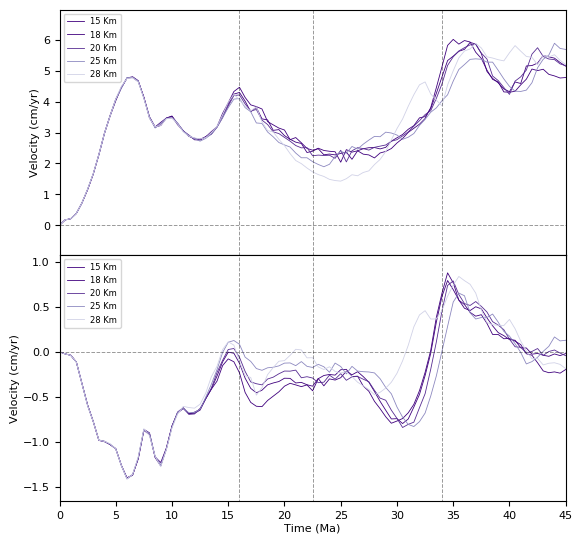

In [290]:
fig=plotSubploterVelocityAlltxt((15/2.54, 14/2.54),[15,18,20,25,28],ColorsPlots,[0,2]) #for 3 use (15/2.54, 18/2.54)
fig

In [291]:
fig.savefig('/home/jovyan/user_data/Figs_PDF_Final/Fig7_raw.pdf')

In [20]:
#fig.set_size_inches()